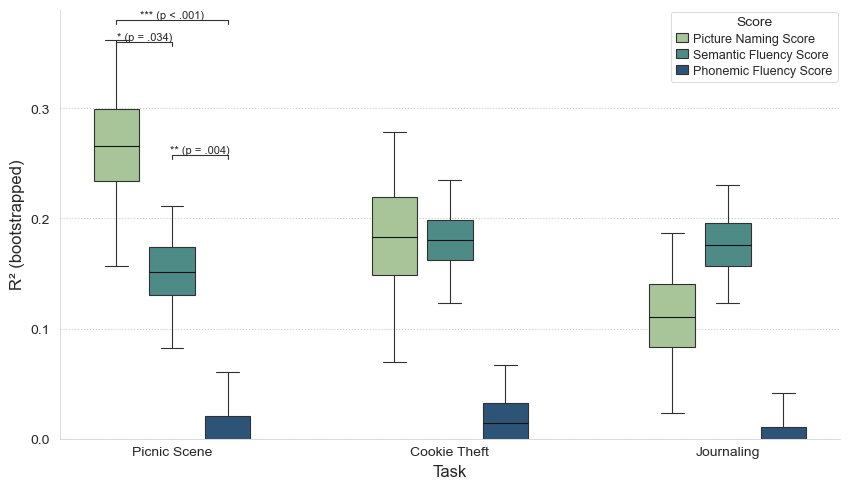

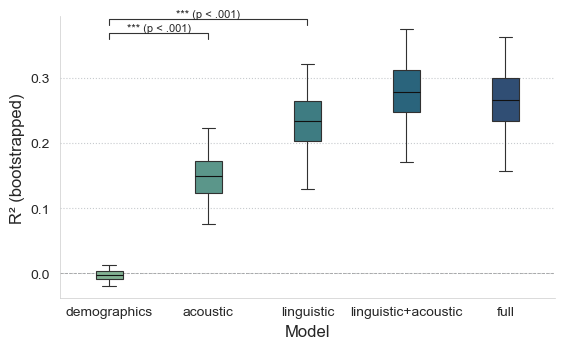

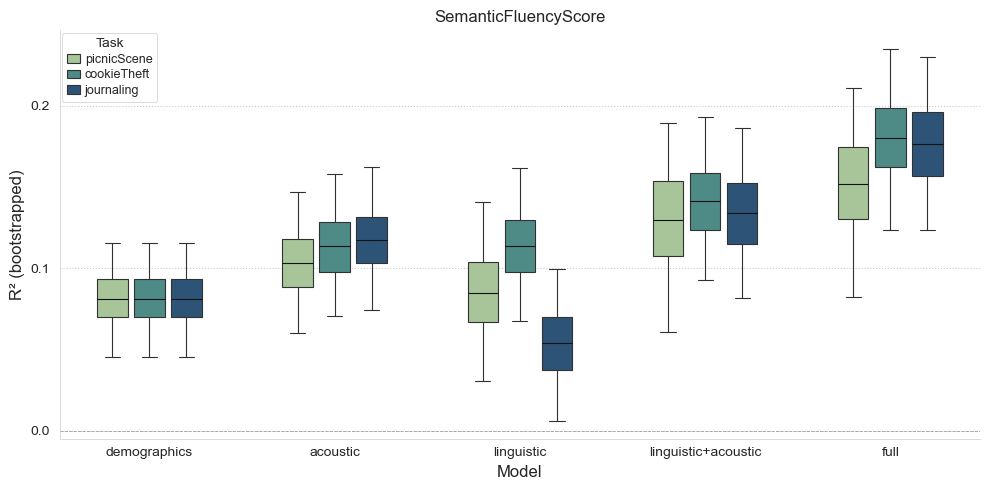

In [2]:
# setup
import os, sys
import pandas as pd
sys.path.append("/Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/src")

from config.constants import GIT_DIRECTORY
from regression.model_evaluation_helpers import (
    pairwise_score_tests_for_task,
    pairwise_task_tests_for_scores,
    pairwise_model_tests_for_task_target
)
from regression.plotting_helpers import (
    plot_bootstrap_score_boxplot_pvals, plot_models_box_with_pvals, plot_bootstrap_model_box
)

# OLS outputs
oof_dir = os.path.join(GIT_DIRECTORY, "results", "regression", "oof_results_linear")
oof_all = pd.read_csv(os.path.join(oof_dir, "oof_preds_all_scores.csv"))
results_dir = os.path.join(GIT_DIRECTORY, "results", "regression", "linear")

# inputs
model = "full"
task  = "picnicScene"
score_order = ["PictureNamingScore","SemanticFluencyScore","PhonemicFluencyScore"]
task_order  = ["picnicScene","cookieTheft","journaling"]
model_order = ["baseline","demographics","acoustic","linguistic","linguistic+acoustic","full"]
n_boot = 1000
random_state = 42

# score comparisons (picnicScene, full)
score_path = os.path.join(results_dir, "score_comparison_linear")
os.makedirs(score_path, exist_ok=True)

score_tests = pairwise_score_tests_for_task(
    oof_preds=oof_all,
    task=task,
    model=model,
    targets=score_order,
    n_boot=n_boot,
    adjust="holm",
    random_state=random_state
)
score_tests.to_csv(os.path.join(score_path, "pairwise_scores_full_picnicScene_OLS.csv"), index=False)

_ = plot_bootstrap_score_boxplot_pvals(
    oof_preds=oof_all,
    model=model,
    task_to_annotate=task,
    n_boot=n_boot,
    order_scores=score_order,
    order_tasks=task_order,
    adjust="holm",
    save_path=score_path
)

# task comparisons (two scores, full) 
task_path = os.path.join(results_dir, "task_comparison_linear")
os.makedirs(task_path, exist_ok=True)

task_tests = pairwise_task_tests_for_scores(
    oof_all,
    scores=("PictureNamingScore","SemanticFluencyScore"),
    tasks=tuple(task_order),
    model="full",
    n_boot=n_boot,
    adjust="holm",
    random_state=random_state
)
task_tests.to_csv(os.path.join(task_path, "pairwise_tasks_full_two_scores_OLS.csv"), index=False)

# model comparisons (picnicScene, Semantic) 
model_path = os.path.join(results_dir, "model_comparison_linear")
os.makedirs(model_path, exist_ok=True)

model_tests = pairwise_model_tests_for_task_target(
    oof_all,
    task="picnicScene",
    target="SemanticFluencyScore",
    models=model_order,
    n_boot=n_boot,
    adjust="holm",
    random_state=random_state
)
model_tests.to_csv(os.path.join(model_path, "pairwise_models_picnicScene_Semantic_OLS.csv"), index=False)

_ = plot_models_box_with_pvals(
    oof_all,
    target="SemanticFluencyScore",
    task="picnicScene",
    order_models=model_order[1:],
    pairs_to_show=[("demographics","acoustic"), ("demographics","linguistic")],
    bracket_gap=0.05,
    tests_df=model_tests,
    save_path=model_path
)

# full score-task-model plot (no stats) 
target = "PictureNamingScore"
oof_target = oof_all[oof_all["target"] == target].copy()
subject_set = set(pd.read_csv(os.path.join(oof_dir, f"{target}_full_subjects.csv"))["Subject_ID"])

_ = plot_bootstrap_model_box(
    oof_target,
    target=target,
    order_models=model_order[1:],
    order_tasks=task_order,
    subject_set=subject_set,
    save_path=model_path
)
